In [2]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
from rdkit import Chem
from rdkit.Chem import Draw
from fragmenstein import Victor, Igor
import sys
import pandas as pd
from itertools import chain
import ast
import subprocess
from rdkit.Chem.Draw import DrawingOptions
from rdkit.Chem import rdFMCS
from IPython.display import display
import xml.etree.ElementTree as ET
import os
import subprocess
os.chdir('/Users/kate_fieseler/PycharmProjects/chemUtils') # Need to add this package to the path
import chemUtils
from chemUtils import *
from chemUtils.visualization.molPlot import draw_molecule_grid_with_captions
from utils.input import process_routes
os.chdir('/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/NCS1/sept4_elab')
from rdkit.Chem.rdfiltercatalog import FilterCatalog, FilterCatalogParams


In [3]:
# 1. Load the data
df = pd.read_csv('4Sept_Dani_additional.csv')
df

,target,Rank_within_target,vendor_id,Reference,USD,Company,Lead time,hit_names,smiles,name
0,CB1R,5,MCULE-7154656852,CSSB03437012178,65,mcule,27 days,x0119-0B-x0128-0B,CN(C)C(CNC(=O)C1=CC=CC(=C1)C#N)C2=CC3=CC=CC=C3O2,CSSB03437012178-x0119-0B-x0128-0B
1,D2R,8,CSSB00000681835,CSSS00121617903,66,enamine ltd,9 days,x0409-0A-x0500-0A,CC1=NN=C2SC(=NN12)C3=CC=CC(NC(=O)CC4=CC=CC=C4)=C3,CSSS00121617903-x0409-0A-x0500-0A
2,Ric8inhibitor,2,Z1310339672,CSSB00102632763,99,enamine ltd,NaN,x0110-3B-x0292-2B,CCOC(=O)C1=C(NC2=CC=CC=C2)N(C=N1)C3=CC=CC=C3,CSSB00102632763-x0110-3B-x0292-2B
3,CB1R,13,Z451568306,NaN,163,enamine ltd,NaN,"x0086_0B,x0488_0B",CC1=CC=CC(NC(=O)CCOC2=CC=CC(Cl)=C2Cl)=C1C(=O)N...,Z451568306-x0086-0B-x0488-0B
4,CB1R,6,MCULE-4179798297,PV-006500547047,65,mcule,27 days,x0110-0A-x0181-1B,COC(=O)C1=CC=CC2=C1N=C(N3CCN(C4=CC(F)=CC=C4)C(...,PV-006500547047-x0110-0A-x0181-1B
5,Ric8inhibitor,3,MCULE-9966574884,CSSS00121613715,39,mcule,17 days,x0071-0B-x0119-2B,O=C(N1CCN(CC1)C2C3=CC=CC=C3C4=CC=CC=C24)C5=CC6...,CSSS00121613715-x0071-0B-x0119-2B


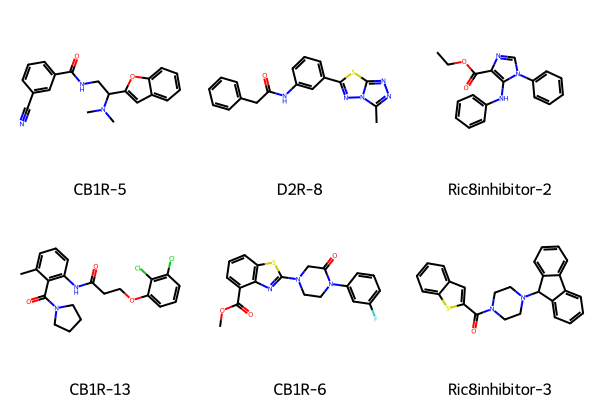

In [9]:
# 2. Look at molecules
target_num_list = ['CB1R-5', 'D2R-8', 'Ric8inhibitor-2', 'CB1R-13', 'CB1R-6', 'Ric8inhibitor-3']
draw_molecule_grid_with_captions(df['smiles'].tolist(), target_num_list)

In [32]:
# 3. Get reactants
# Use only diamond reactions = True
# Run through retrosynthesis Manifold
# search depth = 4
# catalogs = ["mcule_ultimate", "generic", "molport", "mcule", "enamine_bb"]
# cache_fname_tags='NCS1_4Sept'
command = [
    "python",
    "/Users/kate_fieseler/PycharmProjects/postera/postera_retrosynthesis.py",
    "/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/NCS1/sept4_elab/4Sept_Dani_additional.csv",
    "8"
]
subprocess.run(command)

tmpdir: <TemporaryDirectory '/var/folders/sg/gb03t0zx5sz8vw2lxlghz1gr0000gn/T/tmpaz_13c34'>
cache_working_name: /var/folders/sg/gb03t0zx5sz8vw2lxlghz1gr0000gn/T/tmpaz_13c34/cache_postera_NCS1_Warren_Priority_23Aug_diamond.sqlite
Number of entries in cache: 12
---PRE SEARCH---
SqliteDict(/var/folders/sg/gb03t0zx5sz8vw2lxlghz1gr0000gn/T/tmpaz_13c34/cache_postera_NCS1_Warren_Priority_23Aug_diamond.sqlite)
---DONE WITH PRESEARCH---
(2, 1, 1, 1, 1, 1)
saving cache /var/folders/sg/gb03t0zx5sz8vw2lxlghz1gr0000gn/T/tmpaz_13c34/cache_postera_NCS1_Warren_Priority_23Aug_diamond.sqlite /Users/kate_fieseler/PycharmProjects/postera/cache/cache_postera_NCS1_Warren_Priority_23Aug_diamond.sqlite


100%|██████████| 6/6 [00:00<00:00, 579.78it/s]


CompletedProcess(args=['python', '/Users/kate_fieseler/PycharmProjects/postera/postera_retrosynthesis.py', '/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/NCS1/sept4_elab/4Sept_Dani_additional.csv', '8'], returncode=0)

In [33]:
# Get all pathways
command = [
    "python",
    "/Users/kate_fieseler/PycharmProjects/postera/process_cache_outputv2.py",
    "-t",
    "/Users/kate_fieseler/PycharmProjects/postera/cache/cache_postera_NCS1_Warren_Priority_23Aug_diamond.sqlite", # cache to look through
    "-r",
    "/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/NCS1/sept4_elab", # results
    "-s",
    "/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/NCS1/sept4_elab/4Sept_Dani_additional.csv", #smiles csv
    "-x", # retrosynthesis
    "-n",
    "1"
]
subprocess.run(command)

# No error code so all smiles were found

SMILES to search: ['CN(C)C(CNC(=O)C1=CC=CC(=C1)C#N)C2=CC3=CC=CC=C3O2', 'CC1=NN=C2SC(=NN12)C3=CC=CC(NC(=O)CC4=CC=CC=C4)=C3', 'CCOC(=O)C1=C(NC2=CC=CC=C2)N(C=N1)C3=CC=CC=C3', 'CC1=CC=CC(NC(=O)CCOC2=CC=CC(Cl)=C2Cl)=C1C(=O)N3CCCC3', 'COC(=O)C1=CC=CC2=C1N=C(N3CCN(C4=CC(F)=CC=C4)C(=O)C3)S2', 'O=C(N1CCN(CC1)C2C3=CC=CC=C3C4=CC=CC=C24)C5=CC6=CC=CC=C6S5']
Cache path provided: /Users/kate_fieseler/PycharmProjects/postera/cache/cache_postera_NCS1_Warren_Priority_23Aug_diamond.sqlite
Results directory provided: /Users/kate_fieseler/PycharmProjects/retrievesynthesizable/NCS1/sept4_elab
---Performing retrosynthesis search---
Number of steps you are looking for: 1
Saving all routes with 1 step(s) to csv at 4Sept_Dani_additional_routes_1_step.csv


CompletedProcess(args=['python', '/Users/kate_fieseler/PycharmProjects/postera/process_cache_outputv2.py', '-t', '/Users/kate_fieseler/PycharmProjects/postera/cache/cache_postera_NCS1_Warren_Priority_23Aug_diamond.sqlite', '-r', '/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/NCS1/sept4_elab', '-s', '/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/NCS1/sept4_elab/4Sept_Dani_additional.csv', '-x', '-n', '1'], returncode=0)

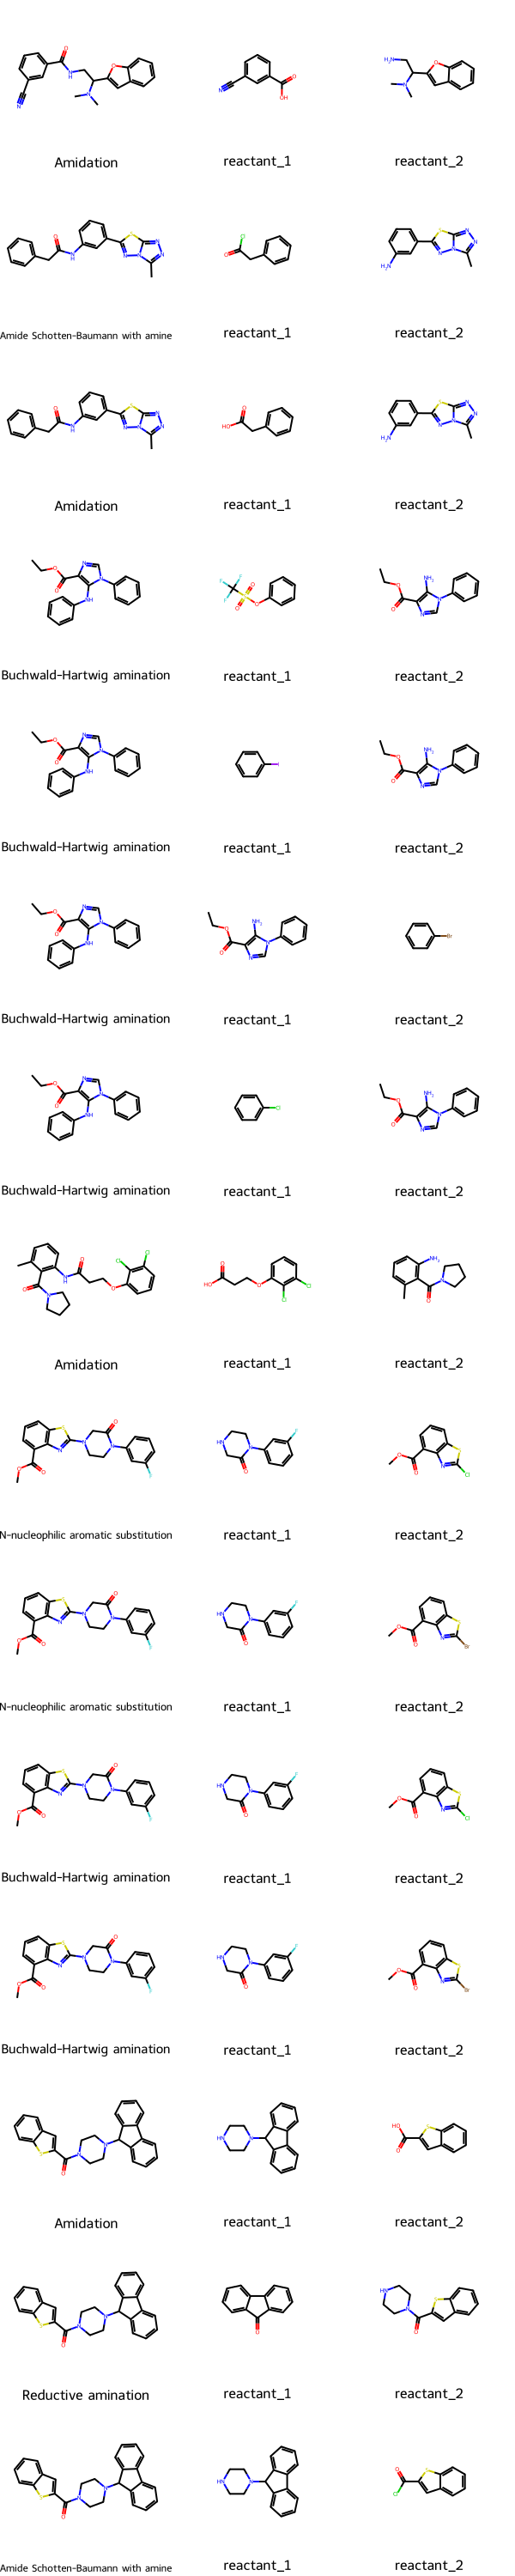

In [35]:
# Look at all compounds and reactions
df = pd.read_csv('4Sept_Dani_additional_routes_1_step_edit.csv')
smiles_and_reactants = list()
caption = list()
for i, row in df.iterrows():
    smiles_and_reactants.append(row['smiles'])
    smiles_and_reactants.append(ast.literal_eval(row['reactants'])[0][0])
    smiles_and_reactants.append(ast.literal_eval(row['reactants'])[0][1])
    caption.append(ast.literal_eval(row['rxn_order_first_to_last'])[0])
    caption.append('reactant_1')
    caption.append('reactant_2')
draw_molecule_grid_with_captions(smiles_and_reactants, caption)

In [ ]:
# TODO: Change elaboration main_v2 to take output from retrosynthesis directly. 
# RUN this command in terminal:
# python main_v2.py -i /Users/kate_fieseler/PycharmProjects/retrievesynthesizable/NCS1/sept4_elab/4Sept_Dani_additional_routes_1_step_edit.csv -r /Users/kate_fieseler/PycharmProjects/retrievesynthesizable/NCS1/sept4_elab/ -u

In [ ]:
# Place 2,000 top compounds from CSSS00121617903-x0409-0A-x0500-0A, had 30,168 analogs


In [ ]:
# Going to try Buchwald-Hartwig Amination
# python main_v2.py -i /Users/kate_fieseler/PycharmProjects/retrievesynthesizable/NCS1/sept4_elab/4Sept_Dani_additional_routes_1_step_edit.csv -r /Users/kate_fieseler/PycharmProjects/retrievesynthesizable/NCS1/sept4_elab/ -u -b 4




CB1R-13